In [1]:
!pip install pywavelets opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.1 MB/s eta 0:00:00


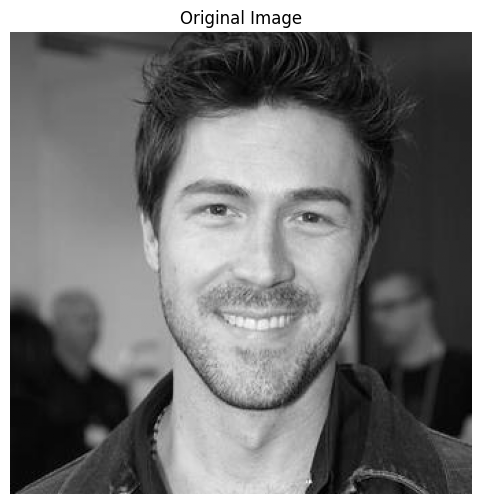

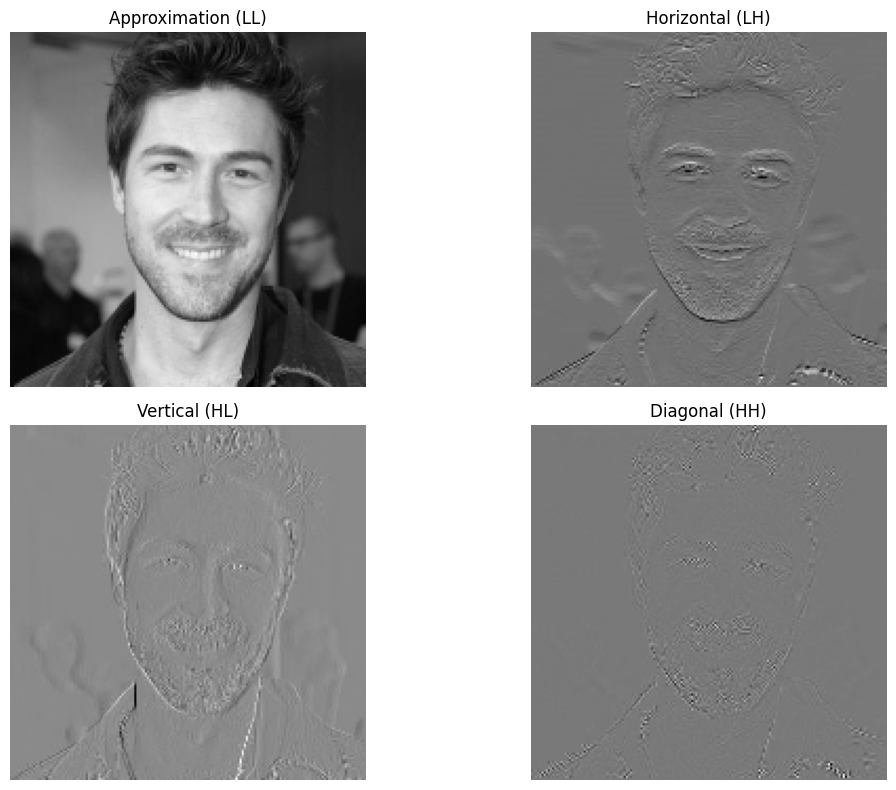

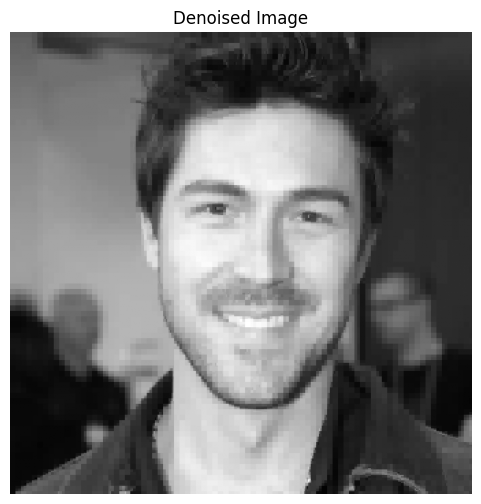

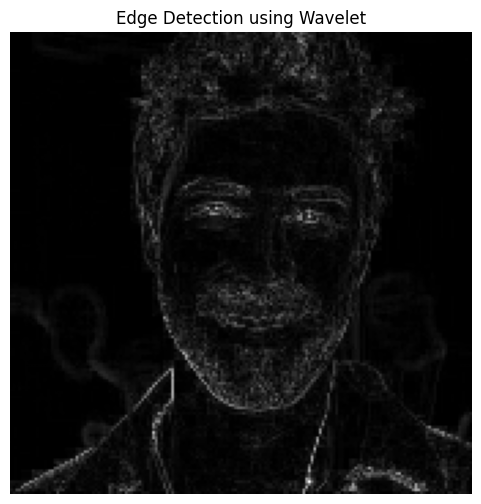

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

def display_image(image, title, cmap='gray', size=(6, 6)):
    """Utility function to display an image."""
    plt.figure(figsize=size)
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

def wavelet_decompose(image, wavelet='haar'):
    """Perform a single-level 2D Discrete Wavelet Transform (DWT) on an image."""
    coeffs2 = pywt.dwt2(image, wavelet)
    LL, (LH, HL, HH) = coeffs2
    return LL, LH, HL, HH

def wavelet_denoise(image, wavelet='haar', threshold=25):
    """Denoise an image using wavelet thresholding."""
    coeffs = pywt.wavedec2(image, wavelet, level=2)
    thresholded_coeffs = [coeffs[0]]
    for details in coeffs[1:]:
        thresholded_coeffs.append(
            tuple(pywt.threshold(detail, threshold, mode='soft') for detail in details)
        )
    denoised_image = pywt.waverec2(thresholded_coeffs, wavelet)
    return np.uint8(np.clip(denoised_image, 0, 255))

def edge_detection(LH, HL, HH):
    """Perform edge detection by combining high-frequency sub-bands."""
    edges = np.abs(LH) + np.abs(HL) + np.abs(HH)
    return np.uint8(np.clip(edges, 0, 255))

def main():
    # Load an image in grayscale
    image = cv2.imread('01.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load image.")
        return

    # Display the original image
    display_image(image, "Original Image")

    # Perform wavelet decomposition
    LL, LH, HL, HH = wavelet_decompose(image, wavelet='haar')

    # Display the decomposed sub-bands
    titles = ['Approximation (LL)', 'Horizontal (LH)', 'Vertical (HL)', 'Diagonal (HH)']
    images = [LL, LH, HL, HH]
    plt.figure(figsize=(12, 8))
    for i, (title, img) in enumerate(zip(titles, images)):
        plt.subplot(2, 2, i + 1)
        plt.title(title)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Apply wavelet-based denoising
    denoised_image = wavelet_denoise(image, wavelet='haar', threshold=25)
    display_image(denoised_image, "Denoised Image")

    # Perform edge detection
    edges = edge_detection(LH, HL, HH)
    display_image(edges, "Edge Detection using Wavelet")

if __name__ == "__main__":
    main()
